This notebook is a test for figuring out the binder environment and making sure that the rate.h5 files I get from Cosmic Integration work

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


In [3]:
# reading in the HDF5 file
pathTorates = '/home/jovyan/CosmicIntegration/Rate_info_BNS_TEST_1.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates)

In [8]:
list(Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [9]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [12]:
# reading in the rates HDF5 file
pathTorates_H5 = '/home/jovyan/CosmicIntegration/Rate_info_BNS_TEST_1.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [13]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [11]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_WDWD_AIS_1/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [14]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [15]:
# gathering the seeds from the rates.h5 file - this is for all of the dcos
dco_mask = rates_info['DCOmask'][()]
merging_all = DCO_WD_data[dco_mask]
merging_all

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
2,1,628.133038,5.821410e-01,0,b'2 ',b'4-8 ',9.648989,1.454633,1,0.001588,...,695,0.033701,14,13,14.260153,0.000880,-1.910579,0.0,0.000000,10.000000
3,1,5402.979047,9.111420e-01,0,b'4 ',b'5-8 ',3.382412,1.470501,1,0.000260,...,858,0.114685,14,13,19.579543,0.000237,-1.725880,0.0,0.000000,10.000000
13,1,152.201286,1.241267e-16,0,b'4 ',b'4 ',14.388043,13.037963,1,0.000496,...,2629,0.039470,14,14,7.283955,0.000000,0.000000,0.0,-0.000361,10.000000
14,1,140.602815,4.475452e-16,0,b'NA ',b'4 ',22.566004,13.764098,1,0.000174,...,2674,0.047091,14,14,6.374143,0.000000,0.000000,0.0,-0.000207,10.000000
25,1,254.671690,1.110223e-16,0,b'NA ',b'4 ',18.768145,9.959553,1,0.000166,...,4947,0.045374,14,14,8.191656,0.000000,0.000000,0.0,-0.000124,10.000000
32,1,486.954358,1.110223e-16,0,b'2 ',b'4 ',15.422342,15.556709,1,0.003313,...,6570,0.057874,14,14,6.486662,0.000000,0.000000,0.0,-0.001497,10.000000
46,0,74.242104,1.110223e-16,0,b'1-2 ',b'2 ',17.139920,28.134266,1,0.001742,...,9281,0.047343,14,14,6.625207,0.000000,0.000000,0.0,0.000000,10.000000
53,0,10.227904,1.570092e-16,0,b'1-2 ',b'2 ',18.641343,34.311960,1,0.000310,...,11398,0.032190,14,14,6.253394,0.000000,0.000000,0.0,-0.017264,10.000000
58,1,9.546455,0.000000e+00,0,b'NA ',b'4 ',20.215514,13.137196,1,0.000442,...,11885,0.022626,14,14,6.364046,0.000000,0.000000,0.0,-0.000341,10.000000
77,1,26.873239,1.145591e-01,0,b'2 ',b'4-8 ',3.093802,3.070936,1,0.006551,...,15282,0.008455,14,14,14.329437,0.000393,-1.890546,0.0,0.000000,10.000000


In [16]:
# let's get the rates for each redshift
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    merging_all['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_53636/2544898430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_53636/2544898430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_53636/2544898430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Getting the total rate for each redshift summing throughout each system

In [17]:
# gettign the mean merger rate per system
total_merger_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(merging_all[merging_all.columns[20+s]])
    total_merger_rate.append(tota_rate)

Let's plot!

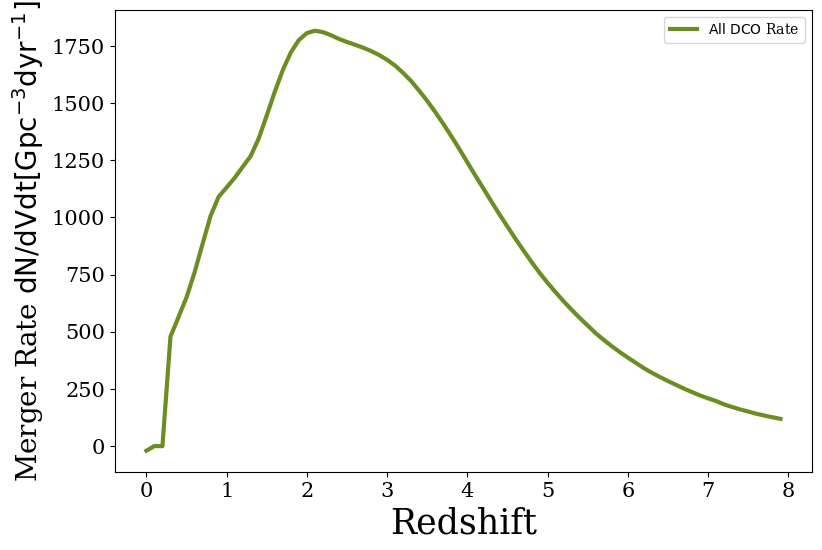

In [23]:
# let's lest plot the different COMPAS version of the rates vs. redshifts
plt.figure(figsize=(9,6))

# let's gather the redshift bins
redshifts = rates_info['redshifts']

plt.plot(redshifts[()],total_merger_rate,linewidth=3,color='olivedrab',label=r'$\mathrm{All}$ $\mathrm{DCO}$ Rate')

plt.ylabel(r"Merger Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()